<a href="https://colab.research.google.com/github/robcovino/MSDAP_notebooks/blob/main/neural_network_from_scratch_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Writing a neural network from scratch in python

From https://victorzhou.com/blog/intro-to-neural-networks/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
  return 1 / (1+ np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    out = np.dot(self.weights, inputs) + self.bias
    return sigmoid(out)

In [ ]:
# instance and initialize the neuron
weights = np.array([0, 1])
bias = 4
n = Neuron(weights, bias)

In [ ]:
# evaluate the neuron on an input
x = np.array([0,1])
n.feedforward(x)

0.9933071490757153

In [ ]:
class NeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)
  Each neuron has the same weights and bias:
    - w = [0, 1]
    - b = 0
  '''
  def __init__(self):
    weights = np.array([0, 1])
    bias = 0
    # Define architecture
    # Use the Neuron class 
    self.h1 = Neuron(weights, bias)
    self.h2 = Neuron(weights, bias)
    self.o1 = Neuron(weights, bias)

  def feedforward(self, x):
    # Define connectivity
    out_h1 = self.h1.feedforward(x)
    out_h2 = self.h2.feedforward(x)

    # The inputs for o1 are the outputs from h1 and h2
    out_o1 = self.o1.feedforward(np.array([out_h1, out_h2]))

    return out_o1

In [ ]:
nn = NeuralNetwork()

nn.feedforward(np.array([2,3]))

0.7216325609518421

In [ ]:
def mse_loss(y_true, y_pred):
  return ((y_true - y_pred)**2).mean()

In [ ]:
y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

mse_loss(y_true, y_pred)

0.5

In [ ]:
class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (h1, h2)
    - an output layer with 1 neuron (o1)

  *** DISCLAIMER ***:
  The code below is intended to be simple and educational, NOT optimal.
  Real neural net code looks nothing like this. DO NOT use this code.
  Instead, read/run it to understand how this specific network works.
  '''
  def __init__(self):
    # Weights
    # they are randomly initialized -- this is also a hyperparameter
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    # Also randomly initialized 
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = sigmoid(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    loss_array = []
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_sigmoid(sum_o1)
        d_ypred_d_w6 = h2 * deriv_sigmoid(sum_o1)
        d_ypred_d_b3 = deriv_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * deriv_sigmoid(sum_h1)
        d_h1_d_b1 = deriv_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_sigmoid(sum_h2)
        d_h2_d_w4 = x[1] * deriv_sigmoid(sum_h2)
        d_h2_d_b2 = deriv_sigmoid(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      
      if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        loss_array.append(loss)
        print("Epoch %d loss: %.3f" % (epoch, loss))
    return loss_array

In [ ]:
# Define dataset
# This is the training data, that has to come from somewhere
data = np.array([
  [-2, -1],  # Alice
  [25, 6],   # Bob
  [17, 4],   # Charlie
  [-15, -6], # Diana
])
all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

Q1. Train your network on the training data, and plot the value of the loss as a function of the training.

In [ ]:
# Train our neural network!
network = OurNeuralNetwork()
loss_array = network.train(data, all_y_trues)

Epoch 0 loss: 0.399
Epoch 10 loss: 0.320
Epoch 20 loss: 0.202
Epoch 30 loss: 0.125
Epoch 40 loss: 0.087
Epoch 50 loss: 0.066
Epoch 60 loss: 0.052
Epoch 70 loss: 0.042
Epoch 80 loss: 0.035
Epoch 90 loss: 0.030
Epoch 100 loss: 0.026
Epoch 110 loss: 0.023
Epoch 120 loss: 0.020
Epoch 130 loss: 0.018
Epoch 140 loss: 0.016
Epoch 150 loss: 0.015
Epoch 160 loss: 0.014
Epoch 170 loss: 0.013
Epoch 180 loss: 0.012
Epoch 190 loss: 0.011
Epoch 200 loss: 0.010
Epoch 210 loss: 0.010
Epoch 220 loss: 0.009
Epoch 230 loss: 0.009
Epoch 240 loss: 0.008
Epoch 250 loss: 0.008
Epoch 260 loss: 0.007
Epoch 270 loss: 0.007
Epoch 280 loss: 0.007
Epoch 290 loss: 0.006
Epoch 300 loss: 0.006
Epoch 310 loss: 0.006
Epoch 320 loss: 0.006
Epoch 330 loss: 0.006
Epoch 340 loss: 0.005
Epoch 350 loss: 0.005
Epoch 360 loss: 0.005
Epoch 370 loss: 0.005
Epoch 380 loss: 0.005
Epoch 390 loss: 0.005
Epoch 400 loss: 0.004
Epoch 410 loss: 0.004
Epoch 420 loss: 0.004
Epoch 430 loss: 0.004
Epoch 440 loss: 0.004
Epoch 450 loss: 0.004

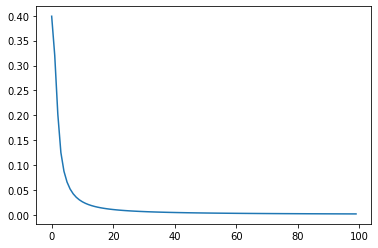

In [ ]:
plt.plot(loss_array)

Q2. Predict the gender of two new data points.

In [ ]:
# Make some predictions
emily = np.array([-7, -3]) # 128 pounds, 63 inches
frank = np.array([20, 2])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Emily: 0.966
Frank: 0.039
